In [8]:
%load_ext Cython
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cma
sns.set(rc={"figure.figsize": (6, 6)})
sns.set_palette('colorblind')

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [9]:
%%cython
cimport cython
cimport numpy as np
import numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def list_of_sequence_size(np.ndarray a):
    cdef int start = -1
    cdef int i
    out = []
    for i in range(len(a)):
        if start == -1 and a[i] == 1:
            start = i
        if start != -1 and a[i] == 0:
            out.append(i - start)
            start = -1
    if start != -1:
        out.append(len(a) - start)
    return out

def sequence_size(a):
    return list_of_sequence_size(a.values)

def sequence_size_mean(a):
    elems = sequence_size(a)
    if elems:
        return np.mean(elems)
    else:
        return np.NaN

In [10]:
fit1 = pd.read_csv("/data/logs/partner_choice_long_sim_norep/fitnesslog.txt", delimiter="\t")


In [11]:
fit = pd.read_csv("/data/logs/partner_choice_long_sim_rep_log/fitnesslog.txt", delimiter="\t")
fit.rename(columns={'pop':'ind', 'minfit': 'rep', 'q1fit': 'fit'}, inplace=True)

<IPython.core.display.Javascript object>


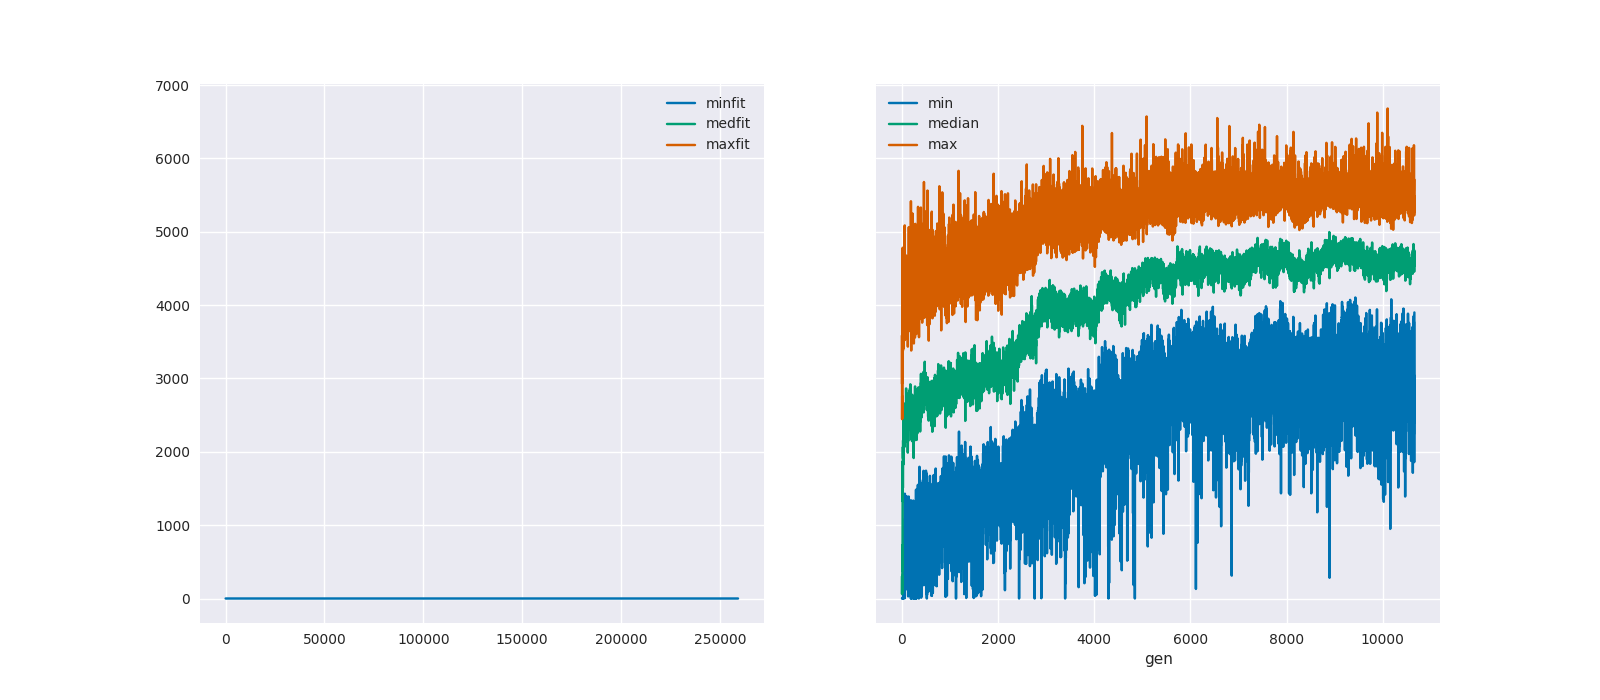

In [7]:
fitgrouped = fit.groupby(('gen', 'ind'), as_index=False).mean()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 7))
fit1[['minfit', 'medfit', 'maxfit']].plot(ax=ax1)
fitgrouped.groupby('gen')['fit'].agg(['min', 'median', 'max']).plot(ax=ax2)

In [30]:
datarep = pd.read_csv("/data/logs/partner_choice_long_sim_rep_log/analysis_log.txt", delimiter="\t")
datanorep = pd.read_csv("/data/logs/partner_choice_long_sim_norep/analysis_log.txt", delimiter="\t")

In [31]:
datarep['cond'] = 'rep'
datanorep['cond'] = 'norep'
data = pd.concat((datarep, datanorep))
del datarep
del datanorep

In [32]:
data['trueInv'] = np.where(data['onOpp'] == 1, data['ownInv'], np.nan)
groupdata = data.groupby(('cond', 'ind', 'coop'), as_index=False).mean()

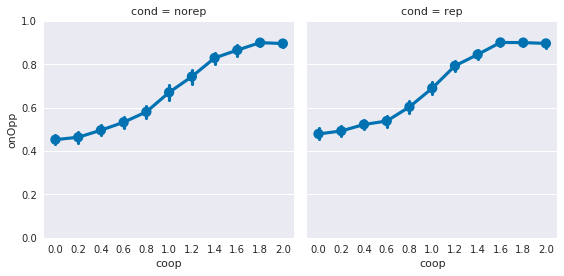

In [33]:
groupplot = sns.factorplot(kind='point', col='cond', x='coop', y='onOpp', data=groupdata, inner='sticks', cut=0, ci=95)
groupplot.set(ylim=(0,1))

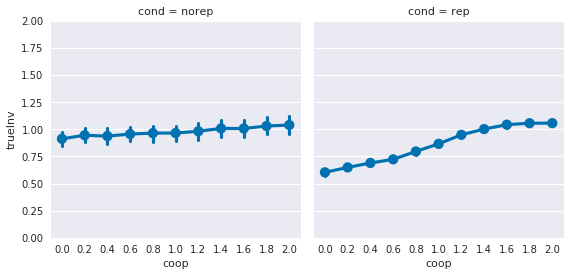

In [29]:
g = sns.factorplot(kind='point', col='cond', x='coop', y='trueInv', data=groupdata, inner='sticks', cut=0)
g.set(ylim=(0,2))


In [22]:
try:
    del datarep
    del datanorep
except: pass
import gc
gc.collect()

94

In [23]:
data.groupby(('cond', 'ind', 'coop', 'rep'))['onOpp'].apply(sequence_size_mean)

cond   ind  coop  rep
norep  0    0.0   0        6.375000
                  1       12.567164
                  2       10.567901
                  3       10.022989
                  4        9.556818
            0.2   0       10.345238
                  1        9.333333
                  2        9.373626
                  3        8.687500
                  4        8.691489
            0.4   0       12.588235
                  1       19.765957
                  2       14.754386
                  3       13.044118
                  4       10.036145
            0.6   0      243.000000
                  1       14.491525
                  2       11.435897
                  3       25.594595
                  4        9.643678
            0.8   0       12.388889
                  1       14.000000
                  2       11.770270
                  3       15.000000
                  4       18.500000
            1.0   0       21.976744
                  1       12.611111
      

In [24]:
time_spent = Out[16].reset_index()

AttributeError: 'FacetGrid' object has no attribute 'reset_index'

In [ ]:
sns.factorplot(y='onOpp', x='coop', data=time_spent.groupby(('cond', 'ind', 'coop'), as_index=False).mean(), col='cond', kind='point')

In [ ]:
%matplotlib inline
fit.groupby(('gen', 'ind')).std().groupby('gen').mean()['fit'].plot()
plt.title('ecart type entre les répétition moyen à chaque génération')